In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

In [12]:
df = pd.DataFrame(df)

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Problem Statement
##### to relate the scoring based on (their back ground) gender race/ethnicity lunch type and thrie parential education 

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Adding up the math_score, reading_score, writing_score as a single feature and calculating its average

In [16]:
df["Total"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average"]=df["Total"]/3

In [17]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Segrigating numeric and categorical data
##### If Data Type is Object maening a string format then it categorical 

In [18]:
categorical_feature =  [ft for ft in df.columns if df[ft].dtype=="object"]
numerical_feature = [ft for ft in df.columns if df[ft].dtype!="object"]

In [19]:
print(f"The categorical data is {categorical_feature} and numeric daty is {numerical_feature}.")

The categorical data is ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] and numeric daty is ['math score', 'reading score', 'writing score', 'Total', 'Average'].


In [20]:
print(df.describe)

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  Total  \
0                    

In [31]:
print("Gender unique {}, numbers {}".format(df["gender"].unique(), df["gender"].nunique()))

Gender unique ['female' 'male'], numbers 2


In [32]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
Total                          194
Average                        194
dtype: int64

In [34]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total                          0
Average                        0
dtype: int64

#### Cheaking for Duplicate data (Replicated data)

In [37]:
df.duplicated().sum()

0

In [43]:
print(df.drop_duplicates().sum())

gender                         femalefemalefemalemalemalefemalefemalemalemale...
race/ethnicity                 group Bgroup Cgroup Bgroup Agroup Cgroup Bgrou...
parental level of education    bachelor's degreesome collegemaster's degreeas...
lunch                          standardstandardstandardfree/reducedstandardst...
test preparation course        nonecompletednonenonenonenonecompletednonecomp...
math score                                                                 66089
reading score                                                              69169
writing score                                                              68054
Total                                                                     203312
Average                                                             67770.666667
dtype: object


#### Check for missing values

In [38]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total                          0
Average                        0
dtype: int64

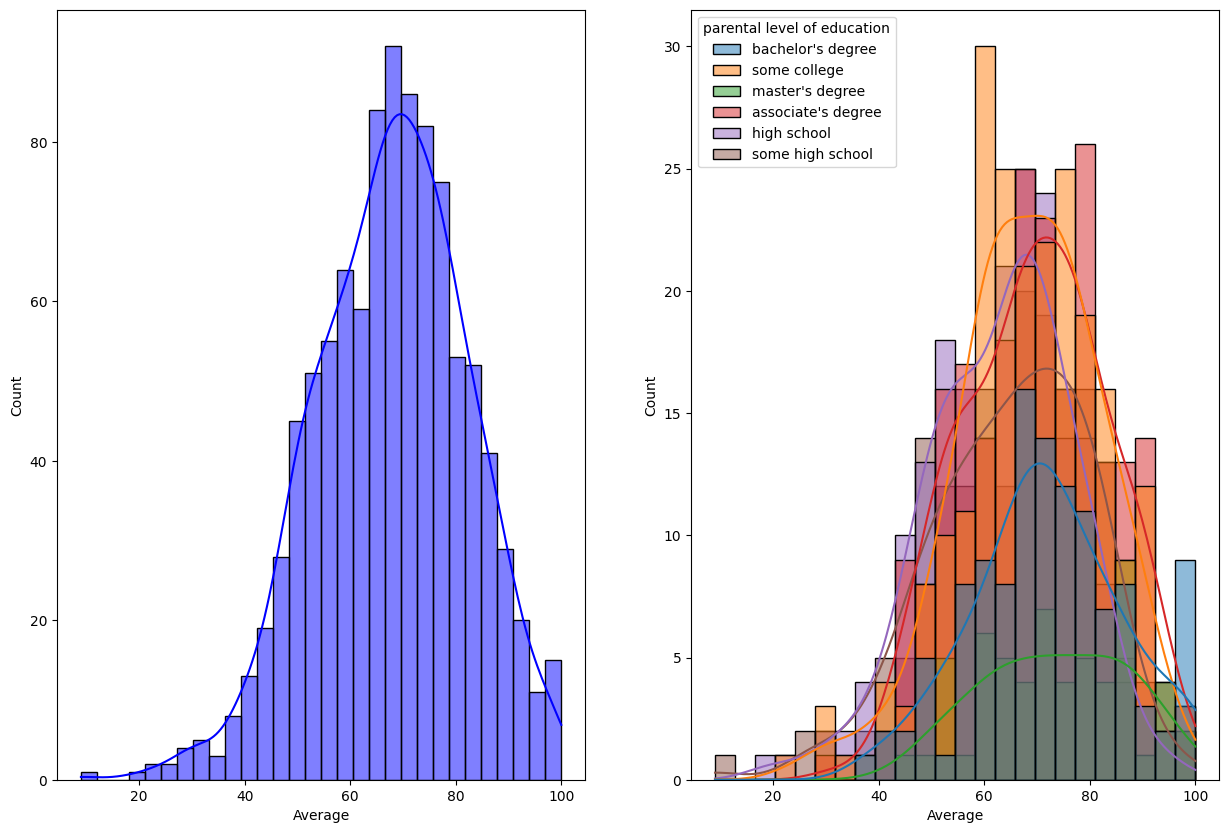

In [62]:
fig,axis=plt.subplots(1,2,figsize=(15,10))
sns.histplot(data=df,x='Average',bins=30,color="blue",kde=True,ax=axis[0])
sns.histplot(data=df,x='Average',kde=True,hue="parental level of education",ax=axis[1])
plt.show()